Accuracy: 50.00%
Confusion Matrix:
[[0 2]
 [0 2]]


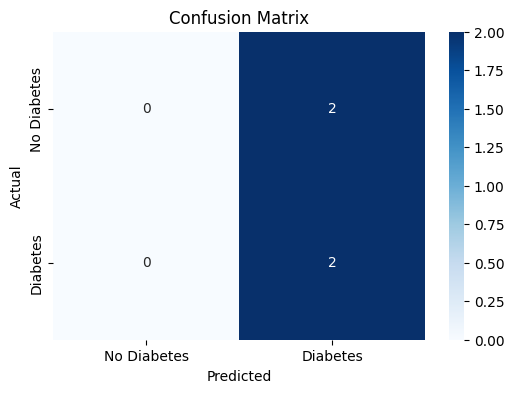

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the data
data = {
    'BloodPressure': [72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74, 80, 60, 72, 0, 84, 74, 30],
    'SkinThickness': [35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, 23, 19, 0, 47, 0, 38],
    'Insulin': [0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, 846, 175, 0, 230, 0, 83],
    'BMI': [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 0, 37.6, 38.0, 27.1, 30.1, 25.8, 30.0, 45.8, 29.6, 43.3],
    'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158, 0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254, 0.183],
    'Age': [50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 34, 57, 59, 51, 32, 31, 31, 33],
    'Outcome': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Features (X) and Labels (y)
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Labels

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the KNN model with k=3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model with accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [5]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Defining the dataset
data = {
    'BloodPressure': [72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74, 80, 60, 72, 0, 84, 74, 30],
    'SkinThickness': [35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, 23, 19, 0, 47, 0, 38],
    'Insulin': [0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, 846, 175, 0, 230, 0, 83],
    'BMI': [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 0, 37.6, 38.0, 27.1, 30.1, 25.8, 30.0, 45.8, 29.6, 43.3],
    'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158, 0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254, 0.183],
    'Age': [50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 34, 57, 59, 51, 32, 31, 31, 33],
    'Outcome': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)  # Features (BloodPressure, SkinThickness, etc.)
y = df['Outcome']  # Target (Outcome)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the Naive Bayes model
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes classifier: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report (precision, recall, f1-score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Example: Select one row from each column for prediction
# Let's assume you select the following values from each column for the query row:
# BloodPressure = 70, SkinThickness = 30, Insulin = 150, BMI = 32.5, DiabetesPedigreeFunction = 0.55, Age = 35

# Create a new query row using the selected values:
query = [[70, 30, 150, 32.5, 0.55, 35]]  # BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

# Predict the outcome for the new query row
predicted_outcome = nb.predict(query)

# Display the predicted outcome in human-readable format
if predicted_outcome[0] == 1:
    print("Prediction: Yes, the person is diabetic.")
else:
    print("Prediction: No, the person is not diabetic.")


Accuracy of Naive Bayes classifier: 50.00%
Confusion Matrix:
[[2 0]
 [2 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

Prediction: Yes, the person is diabetic.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/b

In [6]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Defining the dataset
data = {
    'BloodPressure': [72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74, 80, 60, 72, 0, 84, 74, 30],
    'SkinThickness': [35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, 23, 19, 0, 47, 0, 38],
    'Insulin': [0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, 846, 175, 0, 230, 0, 83],
    'BMI': [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 0, 37.6, 38.0, 27.1, 30.1, 25.8, 30.0, 45.8, 29.6, 43.3],
    'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158, 0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254, 0.183],
    'Age': [50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 34, 57, 59, 51, 32, 31, 31, 33],
    'Outcome': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)  # Features (BloodPressure, SkinThickness, etc.)
y = df['Outcome']  # Target (Outcome)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the Naive Bayes model
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes classifier: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report (precision, recall, f1-score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Example: Select one row from each column for prediction
# Let's assume you select the following values from each column for the query row:
# BloodPressure = 70, SkinThickness = 30, Insulin = 150, BMI = 32.5, DiabetesPedigreeFunction = 0.55, Age = 35

# Create a new query row using the selected values:
query = [[70, 30, 150, 32.5, 0.55, 35]]  # BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

# Predict the outcome for the new query row
predicted_outcome = nb.predict(query)

# Display the predicted outcome (1 = Diabetic, 0 = Non-diabetic)
print(f"Predicted Outcome (1 = Diabetic, 0 = Non-diabetic): {predicted_outcome[0]}")


Accuracy of Naive Bayes classifier: 50.00%
Confusion Matrix:
[[2 0]
 [2 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

Predicted Outcome (1 = Diabetic, 0 = Non-diabetic): 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/b